In [10]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import numpy as np

In [12]:
power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.01)
sample_size

95.10362098169561

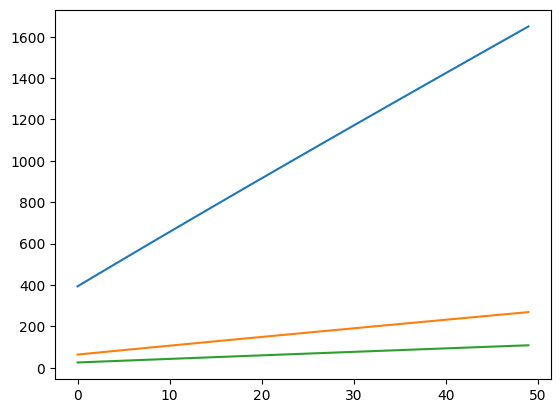

In [11]:
for es in [0.2, 0.5, 0.8]:
    ss = np.zeros(50)
    for i, alpha in enumerate(np.logspace(np.log10(0.05), np.log10(1e-6), 50)):
        ss[i] = power_analysis.solve_power(effect_size=es, power=0.8, alpha=alpha)
    plt.plot(ss)
plt.show()


In [13]:
def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """
    
    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.ttest_ind(group1, group2)
    return(ttresult.pvalue)

In [24]:
num_runs = 5000
effectSize = 0.5

# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=0.8, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int(np.ceil(sampleSize))
print(sampleSize)

p_vals = np.zeros(num_runs)
for run in range(num_runs):
    p_vals[run] = get_t_result(sampleSize, effectSize)


/var/folders/fs/yq11_6_s6kzfftx1vdw7svlw0000gn/T/ipykernel_35006/2808836023.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sampleSize = np.int(np.ceil(sampleSize))


64


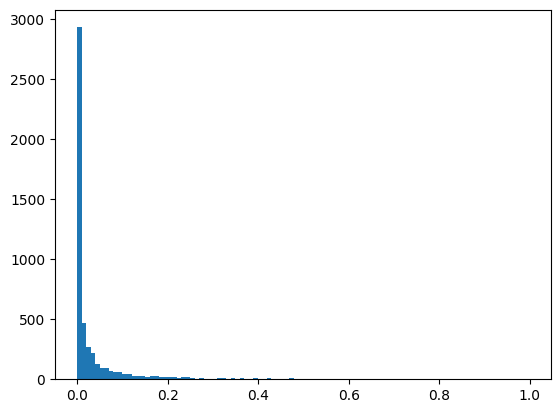

In [25]:
plt.hist(p_vals, 100)
plt.show()

In [27]:
print((p_vals < 0.05).mean())

0.804


0.804 makes sense because the power is 0.8. Power of 0.8 means Type 2 error rate of 0.2. 0.2 means the false negative rate is 0.2. i.e 20% of time we are predicting negative when there ground truth is positive. i.e 20% of the time, the p_value is not < 0.05 => it is greater than 0.05.